# PCA - Word embedding BERT

### Read df
- idx: Indice associato da BERT ad una specifica word

In [1]:
import pandas as pd

TARGET_DATASET = 'TwReyes2013'
df = pd.read_pickle("../reports/{}.pca/PCA_2D.pkl".format(TARGET_DATASET))
df

,principal component 1,principal component 2,idx,word,#+,#-,#,coefficient
0,-2.855021,-10.379145,101,[CLS],10000.0,30000.0,40000.0,-0.500000
1,-3.566171,-0.899788,10166,wow,93.0,114.0,207.0,-0.101449
2,9.985328,1.492696,19387,rt,2146.0,9544.0,11690.0,-0.632849
3,1.403660,14.942133,16099,porsche,2.0,0.0,2.0,1.000000
4,22.539765,-11.893001,8202,##mon,24.0,55.0,79.0,-0.392405
...,...,...,...,...,...,...,...,...
18805,5.562267,13.019250,26701,merritt,0.0,1.0,1.0,-1.000000
18806,-9.956021,-4.959437,29313,##reate,0.0,1.0,1.0,-1.000000
18807,-12.059972,2.286542,9141,circulation,0.0,1.0,1.0,-1.000000
18808,-3.245839,15.274168,17411,oswald,0.0,1.0,1.0,-1.000000


### Keep rows which occurence is above threshold

In [2]:
t = 30
print('Threshold value: {}'.format(t))
df = df[df['#']>t]
df

Threshold value: 30


,principal component 1,principal component 2,idx,word,#+,#-,#,coefficient
0,-2.855021,-10.379145,101,[CLS],10000.0,30000.0,40000.0,-0.500000
1,-3.566171,-0.899788,10166,wow,93.0,114.0,207.0,-0.101449
2,9.985328,1.492696,19387,rt,2146.0,9544.0,11690.0,-0.632849
4,22.539765,-11.893001,8202,##mon,24.0,55.0,79.0,-0.392405
5,20.961661,-10.926970,3240,##ey,31.0,91.0,122.0,-0.491803
...,...,...,...,...,...,...,...,...
16390,-0.733905,2.292916,27833,##terol,0.0,32.0,32.0,-1.000000
16474,15.283625,1.294931,29344,##inho,0.0,40.0,40.0,-1.000000
17069,6.556728,12.945390,16595,bern,0.0,43.0,43.0,-1.000000
17682,-7.640306,14.316161,4883,presidential,0.0,71.0,71.0,-1.000000


### Occurence histogram

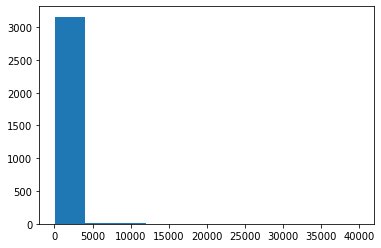

In [3]:
import matplotlib.pyplot as plt

plt.hist(df['#'])
plt.show()

### Plot principal components

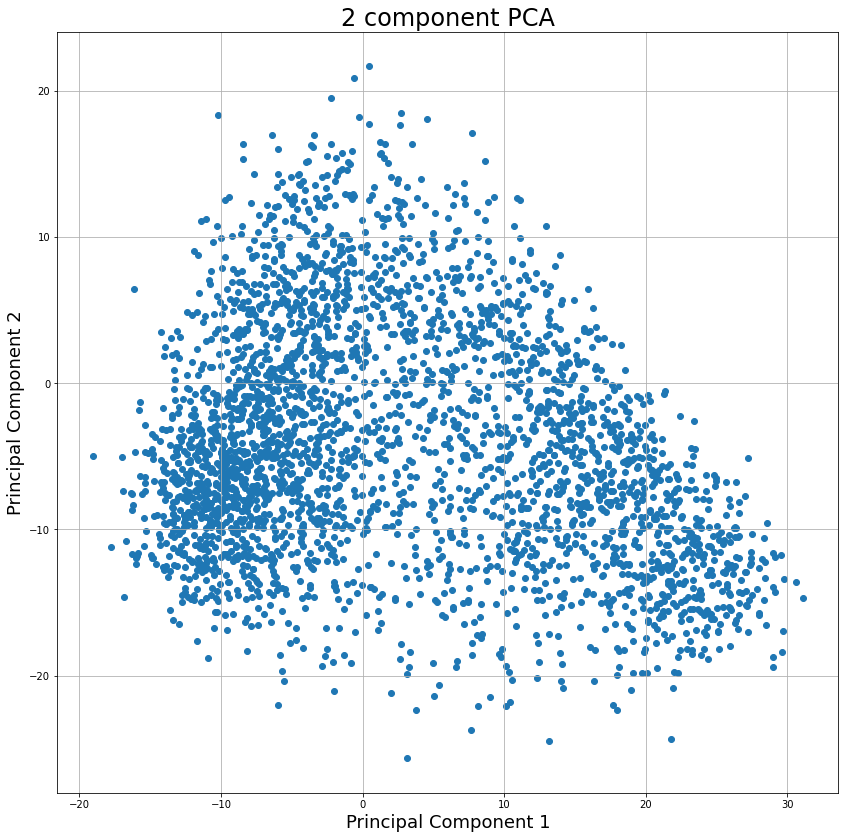

In [4]:
fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(df["principal component 1"], df["principal component 2"])
ax.grid()

### Most discriminating ironic words

In [8]:
ironic_df = df.sort_values(by=['coefficient', '#'], ascending=False)
ironic_df = ironic_df[ironic_df['coefficient'] > 0.5]
'''
ironic_df = pd.concat([ironic_df[ironic_df['word'] == 'irony'],
                       ironic_df[ironic_df['word'] == 'ironic'],
                       ironic_df[ironic_df['word'] == 'sarcasm']])
'''
ironic_df

,principal component 1,principal component 2,idx,word,#+,#-,#,coefficient
10,-2.552669,-5.616014,19728,irony,3572.0,20.0,3592.0,0.988864
1769,14.361157,-12.450587,9711,##iro,51.0,2.0,53.0,0.924528
488,-7.901423,-7.504530,19313,ironic,104.0,8.0,112.0,0.857143
527,-12.848986,-11.171405,3651,realized,31.0,4.0,35.0,0.771429
5714,-11.461713,-6.921123,17949,complaining,31.0,4.0,35.0,0.771429
1842,-6.223025,-13.108880,7818,expand,37.0,5.0,42.0,0.761905
1114,-5.500328,-3.754785,20954,sarcasm,63.0,10.0,73.0,0.726027
4001,-8.731893,3.300427,4823,singing,29.0,6.0,35.0,0.657143
3545,-9.709481,-6.205670,2209,played,37.0,10.0,47.0,0.574468
1778,1.222868,15.662762,4744,truck,28.0,8.0,36.0,0.555556


### Most discriminating non ironic words

In [9]:
nonironic_df = df.sort_values(by=['coefficient', '#'], ascending=True)
nonironic_df = nonironic_df[nonironic_df['coefficient'] < -0.75]
nonironic_df

,principal component 1,principal component 2,idx,word,#+,#-,#,coefficient
13973,-1.724714,6.680237,12313,spiral,0.0,31.0,31.0,-1.000000
14465,10.546798,-20.311596,24518,##tute,0.0,31.0,31.0,-1.000000
13975,-0.292526,1.703026,7504,beam,0.0,32.0,32.0,-1.000000
14395,8.297540,6.652832,21632,whig,0.0,32.0,32.0,-1.000000
16390,-0.733905,2.292916,27833,##terol,0.0,32.0,32.0,-1.000000
...,...,...,...,...,...,...,...,...
5864,-1.670124,-16.720371,11562,click,8.0,57.0,65.0,-0.753846
1718,-12.547326,-7.330200,3160,question,25.0,177.0,202.0,-0.752475
8450,23.280712,-5.596927,3683,##ko,13.0,92.0,105.0,-0.752381
1183,19.787302,-14.881581,8458,##ph,26.0,184.0,210.0,-0.752381


### Plot principal components: ironic vs non ironic¶

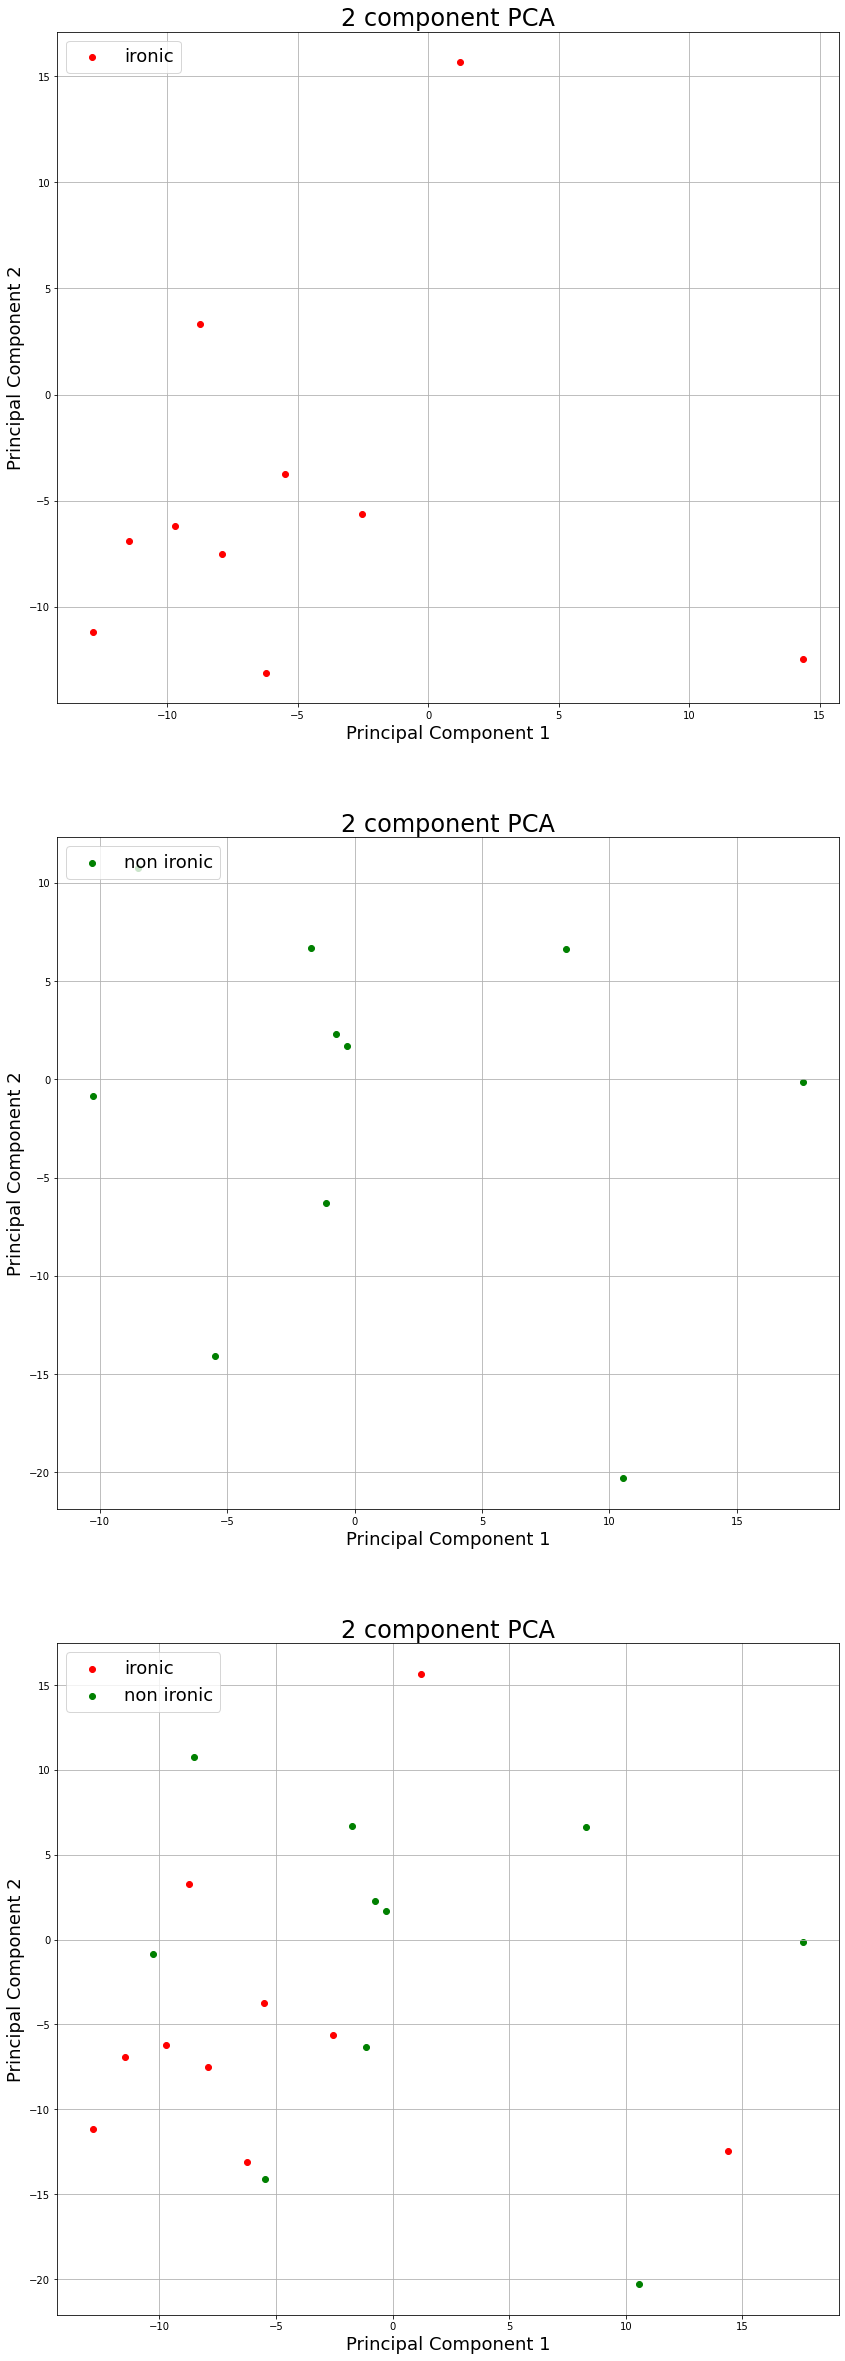

In [10]:
TOP_VALUE = 10
ironic_df = ironic_df.head(TOP_VALUE)
nonironic_df = nonironic_df.head(TOP_VALUE)

# Plot value
fig = plt.figure(figsize = (14, 14*3))

# Ironic
ax = fig.add_subplot(3,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(ironic_df["principal component 1"], ironic_df["principal component 2"], c='r', label='ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

# Non ironic
ax = fig.add_subplot(3,1,2)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(nonironic_df["principal component 1"], nonironic_df["principal component 2"], c='g', label='non ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

# Both
ax = fig.add_subplot(3,1,3)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(ironic_df["principal component 1"], ironic_df["principal component 2"], c='r', label='ironic')
ax.scatter(nonironic_df["principal component 1"], nonironic_df["principal component 2"], c='g', label='non ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

plt.show()